<a href="https://colab.research.google.com/github/aadilganigaie/ML-project/blob/main/Pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install contractions

     |████████████████████████████████| 284 kB 5.5 MB/s 
     |████████████████████████████████| 321 kB 35.7 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85455 sha256=1075b8f7f4ef1601de849337c02d4abe713fe50e8c121cb396d6cdac745d74ee
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 5.4 MB/s 
     |████████████████████████████████| 596 kB 50.3 MB/s 
     |████████████████████████████████| 61 kB 499 kB/s 
     |████████████████████████████████| 895 kB 53.7 MB/s 
     |████████████████████████████████| 3.3 MB 42.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import os
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
import string
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import contractions
from nltk.stem.wordnet import WordNetLemmatizer
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla K80


In [ ]:
df = pd.read_csv('/content/toxic_train3.csv')

In [ ]:
df

,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,Positive,Unnamed: 2
0,sahi bt h,Positive,NaN
1,"Kya bt hai,",Positive,NaN
2,Wah je wah,Positive,NaN
3,Are wha kaya bat hai,Positive,NaN
4,Wah kya baat likhi,Positive,NaN
...,...,...,...
20223,Hamari jese awam teli laga k mazay leti,Negative,NaN
20224,Kaash hum b parhay likhay hotayKabhi likhtay g...,Negative,NaN
20225,Bahi sayasat kufrrr ha saaaf bttttt ha qanon s...,Negative,NaN
20226,aanti toh gussa e kr gai hain,Negative,NaN


In [ ]:
df.columns = ['text', 'sentiment', 're']

In [ ]:
df.drop(columns = ['re'], inplace = True)

In [ ]:
df.dropna(inplace =True)

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Id,text,label,clean,no_contract,text_str,tokenize,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma,lem
0,0.0,0.0,0.0,facebook_corpus_msr_466073,"Most of Private Banks ATM's Like HDFC, ICICI e...",NAG,"most of private banks atm like hdfc, icici etc...","['most', 'of', 'private', 'banks', 'atm', 'lik...","most of private banks atm like hdfc, icici etc...","['most', 'of', 'private', 'banks', 'atm', 'lik...","['most', 'of', 'private', 'banks', 'atm', 'lik...","['private', 'banks', 'atm', 'like', 'hdfc', 'i...","[('private', 'JJ'), ('banks', 'NNS'), ('atm', ...","[('private', 'a'), ('banks', 'n'), ('atm', 'v'...","['private', 'bank', 'atm', 'like', 'hdfc', 'ic...",most of private banks atm like hdfc icici etc ...,most of private banks atm like hdfc icici etc ...
1,1.0,1.0,1.0,facebook_corpus_msr_1493901,"Now question is, Pakistan will adhere to this?",OAG,"now question is, pakistan will adhere to this?","['now', 'question', 'is,', 'pakistan', 'will',...","now question is, pakistan will adhere to this?","['now', 'question', 'is', ',', 'pakistan', 'wi...","['now', 'question', 'is', 'pakistan', 'will', ...","['question', 'pakistan', 'adhere']","[('question', 'NN'), ('pakistan', 'NN'), ('adh...","[('question', 'n'), ('pakistan', 'n'), ('adher...","['question', 'pakistan', 'adhere']",now question is pakistan will adhere to this?,now question is pakistan will adhere to this?
2,2.0,2.0,2.0,facebook_corpus_msr_405512,Pakistan is comprised of fake muslims who does...,OAG,pakistan is comprised of fake muslims who does...,"['pakistan', 'is', 'comprised', 'of', 'fake', ...",pakistan is comprised of fake muslims who does...,"['pakistan', 'is', 'comprised', 'of', 'fake', ...","['pakistan', 'is', 'comprised', 'of', 'fake', ...","['pakistan', 'comprised', 'fake', 'muslims', '...","[('pakistan', 'NN'), ('comprised', 'VBD'), ('f...","[('pakistan', 'n'), ('comprised', 'v'), ('fake...","['pakistan', 'comprise', 'fake', 'muslim', 'kn...",pakistan is comprised of fake muslims who does...,pakistan is comprised of fake muslims who does...
3,3.0,3.0,3.0,facebook_corpus_msr_1521685,"??we r against cow slaughter,so of course it w...",NAG,"??we r against cow slaughter,so of course it w...","['??we', 'r', 'against', 'cow', 'slaughter,so'...","??we r against cow slaughter,so of course it w...","['?', '?', 'we', 'r', 'against', 'cow', 'slaug...","['we', 'r', 'against', 'cow', 'slaughter', 'so...","['r', 'cow', 'slaughter', 'course', 'stop', 'l...","[('r', 'NN'), ('cow', 'NN'), ('slaughter', 'NN...","[('r', 'n'), ('cow', 'n'), ('slaughter', 'n'),...","['r', 'cow', 'slaughter', 'course', 'stop', 'l...",we r against cow slaughterso of course it will...,we r against cow slaughterso of course it will...
4,4.0,4.0,4.0,facebook_corpus_msr_462570,Wondering why Educated Ambassador is strugglin...,CAG,wondering why educated ambassador is strugglin...,"['wondering', 'why', 'educated', 'ambassador',...",wondering why educated ambassador is strugglin...,"['wondering', 'why', 'educated', 'ambassador',...","['wondering', 'why', 'educated', 'ambassador',...","['wondering', 'educated', 'ambassador', 'strug...","[('wondering', 'VBG'), ('educated', 'VBN'), ('...","[('wondering', 'v'), ('educated', 'v'), ('amba...","['wonder', 'educate', 'ambassador', 'struggle'...",wondering why educated ambassador is strugglin...,wondering why educated ambassador is strugglin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,11994.0,11994.0,11994.0,facebook_corpus_msr_394638,They belong to you flight dirty terrorist coun...,OAG,they belong to you flight dirty terrorist coun...,"['they', 'belong', 'to', 'you', 'flight', 'dir...",they belong to you flight dirty terrorist coun...,"['they', 'belong', 'to', 'you', 'flight', 'dir...","['they', 'belong', 'to', 'you', 'flight', 'dir...","['belong', 'flight', 'dirty', 'terrorist', 'co...","[('belong', 'JJ'), ('flight', 'NN'), ('dirty',...","[('belong', 'a'), ('flight', '

In [ ]:
def clean_text(text):
    text = text.lower()
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    text =  text.encode('ascii', 'ignore').decode()
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\'\w+", '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\w*\d+\w*', '', text)
    text = re.sub('\s{2,}', " ", text)
    return text

In [ ]:
df['clean'] = df['text'].apply(clean_text)

In [ ]:
values = np.array(df['label'])
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
print(model.summary())

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
df['sentiment'].unique()

array([0., 1.])

In [ ]:
reviews = df['lem'].values.tolist()
labels = onehot_encoded.tolist()

In [ ]:
from sklearn.model_selection import train_test_split
training_sentences, validation_sentences, training_labels, validation_labels = train_test_split(reviews, labels, test_size=.2)

In [ ]:
import tensorflow as tf
num_gpus_available = len(tf.config.experimental.list_physical_devices('GPU'))
print("Num GPUs Available: ", num_gpus_available)
assert num_gpus_available > 0
from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertForSequenceClassification
import pandas as pd
import numpy as np

Num GPUs Available:  1


In [ ]:
#Assign tokenizer object to the tokenizer class
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
train_encodings = tokenizer(training_sentences,
                            truncation=True,
                            padding=True)
val_encodings = tokenizer(validation_sentences,
                            truncation=True,
                            padding=True)
train_dataset = tf.data.Dataset.from_tensor_slices((
                            dict(train_encodings),
                            training_labels
                            ))
val_dataset = tf.data.Dataset.from_tensor_slices((
                            dict(val_encodings),
                            validation_labels
                            ))

In [ ]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=2)

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'vocab_projector', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_57']
You should probably TRAIN this model on a down-stream task to be able to use i

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_dataset.shuffle(100).batch(16),
          epochs=10,
          batch_size=16,
          validation_data=val_dataset.shuffle(100).batch(16))

Epoch 1/10
600/600 [==============================] - 1089s 2s/step - loss: 9.7283 - accuracy: 0.3152 - val_loss: 10.3736 - val_accuracy: 0.4106
Epoch 2/10
600/600 [==============================] - 1066s 2s/step - loss: 9.7804 - accuracy: 0.3253 - val_loss: 10.3736 - val_accuracy: 0.4106
Epoch 3/10
600/600 [==============================] - 1067s 2s/step - loss: 9.7602 - accuracy: 0.3258 - val_loss: 10.3736 - val_accuracy: 0.4106
Epoch 4/10
600/600 [==============================] - 1066s 2s/step - loss: 9.6930 - accuracy: 0.3228 - val_loss: 10.3736 - val_accuracy: 0.4106
Epoch 5/10
600/600 [==============================] - 1067s 2s/step - loss: 9.7199 - accuracy: 0.3279 - val_loss: 10.3736 - val_accuracy: 0.4106
Epoch 6/10
600/600 [==============================] - 1068s 2s/step - loss: 9.7787 - accuracy: 0.3243 - val_loss: 10.3736 - val_accuracy: 0.4106
Epoch 7/10
600/600 [==============================] - 1066s 2s/step - loss: 9.6628 - accuracy: 0.3192 - val_loss: 10.3736 - val_ac

In [ ]:
model.save_pretrained("./sentiment")
loaded_model = TFDistilBertForSequenceClassification.from_pretrained("./sentiment")

Some layers from the model checkpoint at ./sentiment were not used when initializing TFDistilBertForSequenceClassification: ['dropout_57']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at ./sentiment and are newly initialized: ['dropout_77']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
test_sentence = df['text'][23]
predict_input = tokenizer.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

In [ ]:
tf_output = loaded_model.predict(predict_input)[0]
tf_prediction = tf.nn.softmax(tf_output, axis=1)
labels = ['Negative','Positive']
label = tf.argmax(tf_prediction, axis=1)
label = label.numpy()
print(labels[label[0]])

Negative


In [ ]:
#Using machine learning

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#making corpus or words from comments
import re
from nltk.stem.porter import PorterStemmer
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/Roman-Urdu-DataSet.csv')

In [ ]:
df.columns = ['text', 'sentiment', 're']

In [ ]:
df.drop(columns = ['re'], inplace = True)

In [ ]:
df.dropna(inplace = True)

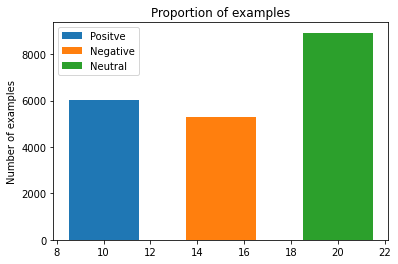

In [ ]:
Pos = df[df['sentiment'] == 'Positive'].shape[0]
Neg = df[df['sentiment'] == 'Negative'].shape[0]
Neu = df[df['sentiment'] == 'Neutral'].shape[0]
# bar plot of the 3 classes
plt.bar(10,Pos,3, label="Positve")
plt.bar(15,Neg,3, label="Negative")
plt.bar(20,Neu,3, label="Neutral")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()

In [ ]:
df.loc[df['sentiment']=='Neative']

,text,sentiment
13276,product achi hai but wrong waist size send kar...,Neative


In [ ]:
df.drop(index = 13276, inplace =True)

In [ ]:
# label selection
y=df.iloc[:,1].values
labelEnocder_y=LabelEncoder()
y=labelEnocder_y.fit_transform(y)
# 2 postive 0 negative 1 nuetral

In [ ]:
corpus=[]
stopwords=['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh', 'rha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch', 'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to', 'is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala', 'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'nai', 'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil', 'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou']
for i in range(0,20226):
    review = re.sub('[^a-zA-Z]',' ',df.iloc[:,0].values[i])
    review=review.lower()
    review=review.split()
    review=[word for word in review if not word in stopwords]
    review=' '.join(review)
    corpus.append(review)

In [ ]:
type(corpus)

list

In [ ]:
cv=CountVectorizer(max_features=2500)
x=cv.fit_transform(corpus).toarray()

In [ ]:
vocab = len(corpus)
print(vocab)

20226


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
classifier=LogisticRegression(random_state=0,solver='liblinear',multi_class='auto')
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)

In [ ]:
print('Accuracy is {} '.format(accuracy_score(y_test, y_pred)))

Accuracy is 0.6374196737518537 


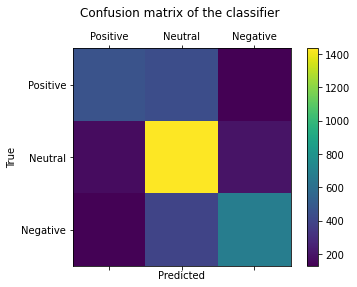

In [ ]:
labels=['Positive','Neutral','Negative']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier \n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()